### 10.5.1 K-Means Clustering

In [25]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.4f}'.format) # get rid of scientific notation

plt.style.use('seaborn-white') # pretty matplotlib plots

In [23]:
from sklearn.cluster import KMeans

/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

#### K = 2

In [8]:
X.shape

(50, 2)

In [7]:
X[:5]

array([[ 2.58324215, -4.05626683],
       [ 0.8638039 , -2.35972919],
       [ 1.20656441, -4.84174737],
       [ 3.50288142, -5.24528809],
       [ 1.94204778, -4.90900761]])

In [28]:
km1 = KMeans(n_clusters=2, n_init=20)

# Init signature: KMeans(n_clusters=8, init='k-means++', 
#                        n_init=10, max_iter=300, tol=0.0001, 
#                        precompute_distances='auto', verbose=0, 
#                        random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

In [30]:
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

See plot for K=2 below.

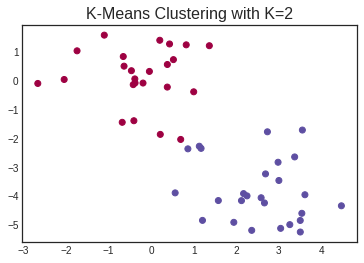

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=km1.labels_, cmap='Spectral')
plt.title('K-Means Clustering with K=2', size=16);

####  K = 3

In [14]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
pd.Series(km1.labels_).value_counts()

1    26
0    24
dtype: int64

In [15]:
pd.Series(km2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [16]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [17]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2], dtype=int32)

In [18]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.97379200939726

In [33]:
km1.inertia_

99.30578397914685

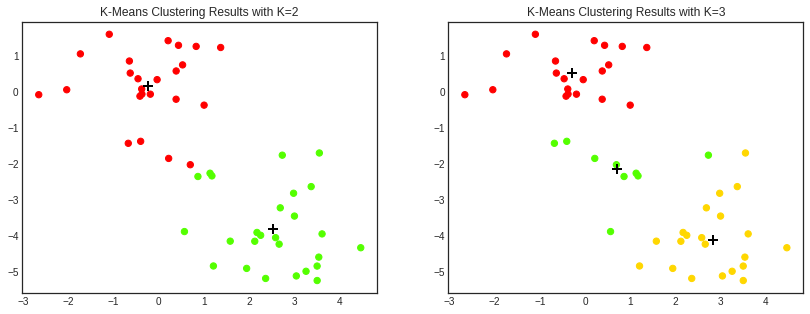

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### 10.5.3 Hierarchical Clustering

#### scipy

In [ ]:
from scipy.cluster import hierarchy

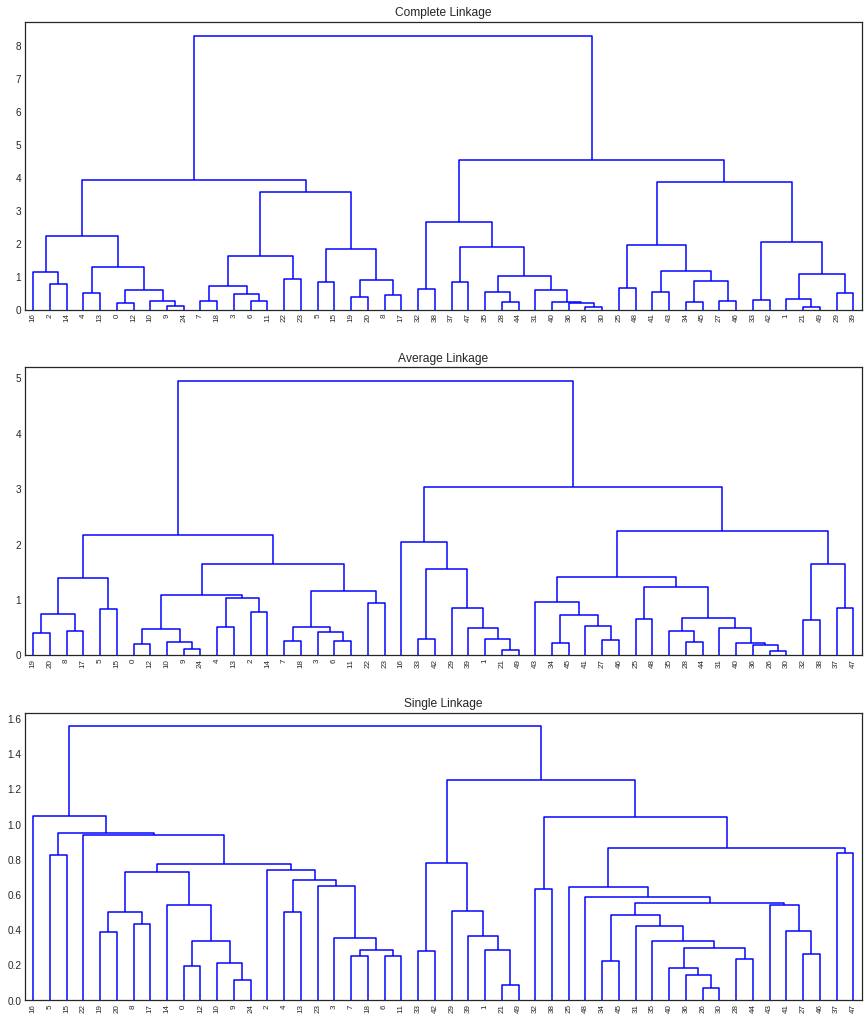

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], 
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

In [45]:
from scipy.cluster.hierarchy import linkage, dendrogram

hc_complete = linkage(X, method='complete')
hc_average = linkage(X, method='average')
hc_single = linkage(X, method='single')

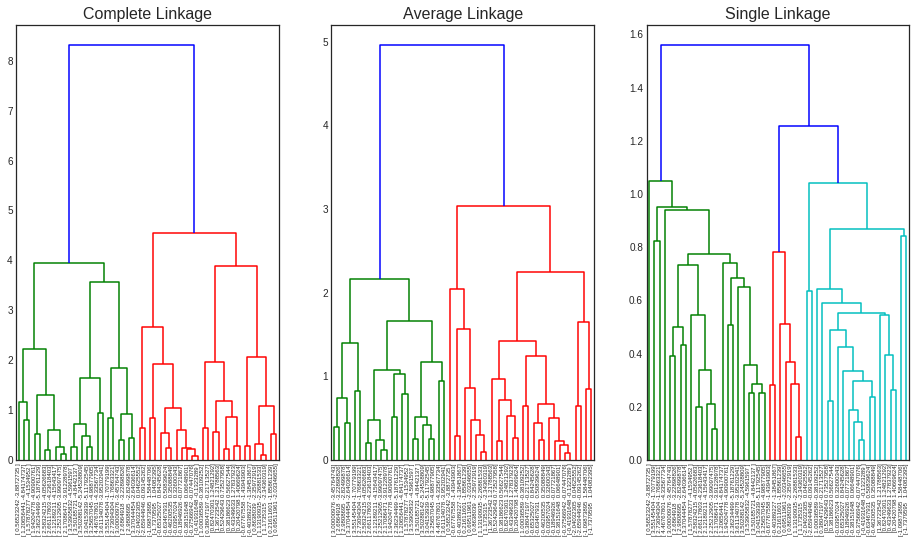

In [46]:
f, axes = plt.subplots(1, 3, sharex=False, sharey=False)

f.set_figheight(8)
f.set_figwidth(16)

dendrogram(hc_complete,
           labels=X,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[0])

dendrogram(hc_average,
           labels=X,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[1])

dendrogram(hc_single,
           labels=X,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[2])

axes[0].set_title('Complete Linkage', size=16)
axes[1].set_title('Average Linkage', size=16)
axes[2].set_title('Single Linkage', size=16);

In [47]:
from scipy.cluster.hierarchy import fcluster, cut_tree

In [48]:
cut_tree(hc_complete, 2).ravel()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [49]:
cut_tree(hc_average, 2).ravel()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [50]:
cut_tree(hc_single, 2).ravel()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [51]:
cut_tree(hc_single, 4).ravel()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 1])

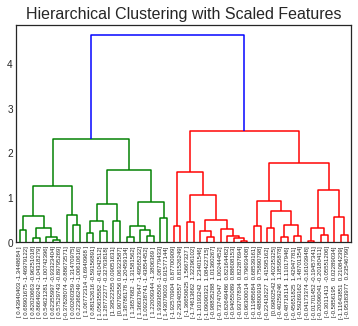

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

dendrogram(linkage(x_scaled, method='complete'),
           labels=x_scaled,
           leaf_rotation=90,
           leaf_font_size=6)

plt.title('Hierarchical Clustering with Scaled Features', size=16);

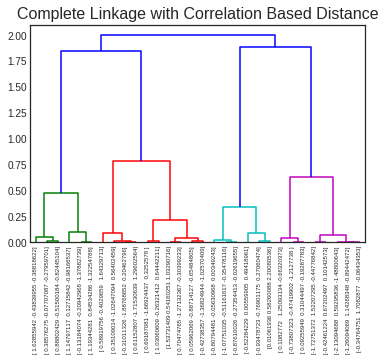

In [53]:
x = np.random.normal(size=30*3).reshape(30, 3)

# scipy linkage takes care of the distance function pdist
dendrogram(linkage(x, method='complete', metric='correlation'),
           labels=x,
           leaf_rotation=90,
           leaf_font_size=6)

plt.title('Complete Linkage with Correlation Based Distance', size=16);